## Dodecahedron

In [8]:
import numpy as np

In [9]:
# Phi is the golden ratio
phi = (1 + np.sqrt(5)) / 2

# should we normalize?
a, b = 1, 1 / phi

# 20 vertices of a regular dodecahedron
vertices = np.array([
    # 8 of type (±1, ±1, ±1)
    [+a, +a, +a],
    [+a, +a, -a],
    [+a, -a, +a],
    [+a, -a, -a],
    [-a, +a, +a],
    [-a, +a, -a],
    [-a, -a, +a],
    [-a, -a, -a],
    
    # 4 of type (0, ±1/phi, ±phi)
    [0, +b, +phi],
    [0, +b, -phi],
    [0, -b, +phi],
    [0, -b, -phi],
    
    # 4 of type (±1/phi, ±phi, 0)
    [+b, +phi, 0],
    [+b, -phi, 0],
    [-b, +phi, 0],
    [-b, -phi, 0],
    
    # 4 of type (±phi, 0, ±1/phi)
    [+phi, 0, +b],
    [+phi, 0, -b],
    [-phi, 0, +b],
    [-phi, 0, -b],
])

In [10]:
vertices.shape

(20, 3)

In [11]:
faces = [
    [0, 8, 10, 2, 16],
    [0, 16, 17, 1, 12],
    [1, 17, 3, 11, 9],
    [1, 9, 5, 14, 12],
    [0, 12, 14, 4, 8],
    [3, 17, 16, 2, 13],
    [2, 10, 6, 15, 13],
    [3, 13, 15, 7, 11],
    [4, 14, 5, 19, 18],
    [4, 18, 6, 10, 8],
    [5, 9, 11, 7, 19],
    [6, 18, 19, 7, 15],
]

### Barycenters

In [12]:
barycenters = np.vstack( [ np.mean( np.vstack( [ vertices[j,:] for j in fi ] ) , axis = 0) for fi in faces ] )

In [13]:
np.vstack( [ vertices[j,:] for j in faces[0] ] )

array([[ 1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.61803399,  1.61803399],
       [ 0.        , -0.61803399,  1.61803399],
       [ 1.        , -1.        ,  1.        ],
       [ 1.61803399,  0.        ,  0.61803399]])

In [14]:
np.mean(np.vstack( [ vertices[j,:] for j in faces[0] ] ), axis=0 )

array([0.7236068 , 0.        , 1.17082039])

In [15]:
barycenters.shape

(12, 3)

### Order faces by decreasing z, then counterclockwise

In [16]:
def order_3D( i ):
    # ordering function

    v = barycenters[i,:]
    z = -v[2]
    theta = np.arctan2(v[1],v[0])
    
    return ( z , theta )

In [17]:
order = list(sorted(list(range(12)) , key=order_3D ))

In [18]:
order

[0, 9, 6, 4, 11, 5, 1, 8, 7, 3, 2, 10]

## Reorder the lists

In [19]:
faces = [ faces[i] for i in order ]

In [20]:
faces

[[0, 8, 10, 2, 16],
 [4, 18, 6, 10, 8],
 [2, 10, 6, 15, 13],
 [0, 12, 14, 4, 8],
 [6, 18, 19, 7, 15],
 [3, 17, 16, 2, 13],
 [0, 16, 17, 1, 12],
 [4, 14, 5, 19, 18],
 [3, 13, 15, 7, 11],
 [1, 9, 5, 14, 12],
 [1, 17, 3, 11, 9],
 [5, 9, 11, 7, 19]]

In [21]:
barycenters = barycenters[order,:]

In [22]:
barycenters

array([[ 0.7236068 ,  0.        ,  1.17082039],
       [-0.7236068 ,  0.        ,  1.17082039],
       [ 0.        , -1.17082039,  0.7236068 ],
       [ 0.        ,  1.17082039,  0.7236068 ],
       [-1.17082039, -0.7236068 ,  0.        ],
       [ 1.17082039, -0.7236068 ,  0.        ],
       [ 1.17082039,  0.7236068 ,  0.        ],
       [-1.17082039,  0.7236068 ,  0.        ],
       [ 0.        , -1.17082039, -0.7236068 ],
       [ 0.        ,  1.17082039, -0.7236068 ],
       [ 0.7236068 ,  0.        , -1.17082039],
       [-0.7236068 ,  0.        , -1.17082039]])

In [23]:
vertices

array([[ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        , -1.        ],
       [ 1.        , -1.        ,  1.        ],
       [ 1.        , -1.        , -1.        ],
       [-1.        ,  1.        ,  1.        ],
       [-1.        ,  1.        , -1.        ],
       [-1.        , -1.        ,  1.        ],
       [-1.        , -1.        , -1.        ],
       [ 0.        ,  0.61803399,  1.61803399],
       [ 0.        ,  0.61803399, -1.61803399],
       [ 0.        , -0.61803399,  1.61803399],
       [ 0.        , -0.61803399, -1.61803399],
       [ 0.61803399,  1.61803399,  0.        ],
       [ 0.61803399, -1.61803399,  0.        ],
       [-0.61803399,  1.61803399,  0.        ],
       [-0.61803399, -1.61803399,  0.        ],
       [ 1.61803399,  0.        ,  0.61803399],
       [ 1.61803399,  0.        , -0.61803399],
       [-1.61803399,  0.        ,  0.61803399],
       [-1.61803399,  0.        , -0.61803399]])

In [24]:
faces

[[0, 8, 10, 2, 16],
 [4, 18, 6, 10, 8],
 [2, 10, 6, 15, 13],
 [0, 12, 14, 4, 8],
 [6, 18, 19, 7, 15],
 [3, 17, 16, 2, 13],
 [0, 16, 17, 1, 12],
 [4, 14, 5, 19, 18],
 [3, 13, 15, 7, 11],
 [1, 9, 5, 14, 12],
 [1, 17, 3, 11, 9],
 [5, 9, 11, 7, 19]]

In [25]:
barycenters

array([[ 0.7236068 ,  0.        ,  1.17082039],
       [-0.7236068 ,  0.        ,  1.17082039],
       [ 0.        , -1.17082039,  0.7236068 ],
       [ 0.        ,  1.17082039,  0.7236068 ],
       [-1.17082039, -0.7236068 ,  0.        ],
       [ 1.17082039, -0.7236068 ,  0.        ],
       [ 1.17082039,  0.7236068 ,  0.        ],
       [-1.17082039,  0.7236068 ,  0.        ],
       [ 0.        , -1.17082039, -0.7236068 ],
       [ 0.        ,  1.17082039, -0.7236068 ],
       [ 0.7236068 ,  0.        , -1.17082039],
       [-0.7236068 ,  0.        , -1.17082039]])

In [26]:
np.linalg.norm(barycenters , axis=1)

array([1.37638192, 1.37638192, 1.37638192, 1.37638192, 1.37638192,
       1.37638192, 1.37638192, 1.37638192, 1.37638192, 1.37638192,
       1.37638192, 1.37638192])

In [27]:
p = np.array([0.345 , 1.56, 3.445])

In [28]:
norm = np.linalg.norm(p)
norm

3.7974530938511935

In [29]:
p = np.sqrt(3)*p/norm

In [30]:
p

array([0.15735745, 0.71152933, 1.57129394])

In [31]:
P = np.vstack([p]*12)

In [32]:
P.shape

(12, 3)

In [33]:
distances = np.linalg.norm( p - barycenters, axis = 1) 

In [34]:
np.argmin(distances)

3

In [35]:
distances

array([0.99362537, 1.20114573, 2.07040463, 0.97687417, 2.50851285,
       2.35705059, 1.86981754, 2.05746613, 2.97230067, 2.34569372,
       2.88896233, 2.96674283])

## Plot

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection

In [37]:
# get edges from faces
edges = set()
for face in faces:
    for i in range(5):
        v1 = face[i]
        v2 = face[(i + 1) % 5]
        edges.add(tuple(sorted((v1, v2))))  # this is an undirected edge!

# From pairs of indices to pairs of vertices
edge_lines = [ [vertices[i], vertices[j]] for i, j in edges ]


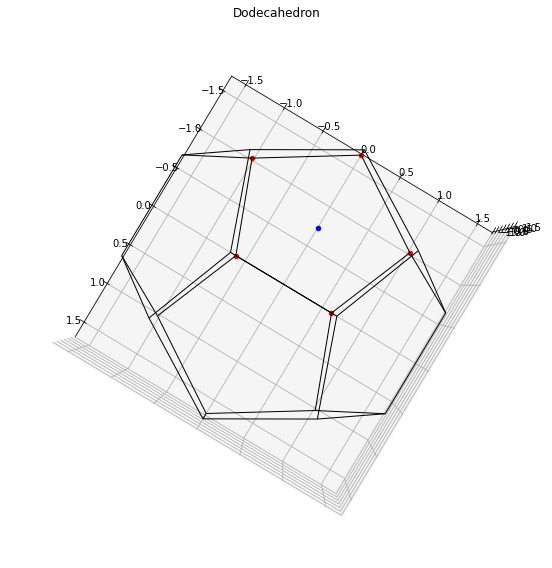

In [38]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Wireframe
edge_collection = Line3DCollection(edge_lines, color='k', linewidth=1)
ax.add_collection3d(edge_collection)

FF = 11

# Add vertices in red
for i in faces[FF]:
    ax.scatter(vertices[i, 0], vertices[i, 1], vertices[i, 2], color='red')

# Add barycenters
for i in [FF]:
    ax.scatter(barycenters[i, 0], barycenters[i, 1], barycenters[i, 2], color='blue')

# Limits
ax.set_box_aspect([1, 1, 1])
max_range = np.max(np.abs(vertices))
ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)
ax.set_zlim(-max_range, max_range)

# View angle
ax.view_init(elev=90, azim=30)

ax.set_title("Dodecahedron")
plt.tight_layout()
plt.show()

## Check everything is planar

In [39]:
for i in range(12):

    face = faces[i]
    points = vertices[face,:]

    points = points - points[0,:]

    rank = np.linalg.matrix_rank(points)

    U, S, Vh = np.linalg.svd(points)

    print(rank)
    print(S)

2
[2.87954789e+00 1.66250775e+00 1.41545497e-16]
2
[2.87954789e+00 1.66250775e+00 1.41545497e-16]
2
[2.87954789e+00 1.66250775e+00 6.52572721e-17]
2
[2.87954789e+00 1.66250775e+00 5.83678785e-17]
2
[2.87954789e+00 1.66250775e+00 3.51491667e-16]
2
[2.87954789e+00 1.66250775e+00 3.51491667e-16]
2
[2.87954789e+00 1.66250775e+00 3.51491667e-16]
2
[2.87954789e+00 1.66250775e+00 3.51491667e-16]
2
[2.87954789e+00 1.66250775e+00 5.83678785e-17]
2
[2.87954789e+00 1.66250775e+00 6.52572721e-17]
2
[2.87954789e+00 1.66250775e+00 1.41545497e-16]
2
[2.87954789e+00 1.66250775e+00 1.41545497e-16]


## Now check that they are well-oriented

For each face find the barycenter. Check that consecutive vertices have minimal length, among all possible vertice-pair distances. This means they are on the perimeter. 
Compute the barycenter of the "sphere", $B$, and the barycenter of the face $b$. The tangent vector $n := b + \overline{B-b}$ is the outer normal. For each $i$, the triplet $n$, $v_i - b$ and $v_{i+1} - v_i$ should have positive volume (wedge product).

In [40]:
B = np.mean(vertices, axis=0) # the center is the origin!

for i,face in enumerate(faces):
    b = np.mean( vertices[face,:] , axis = 0 )

    print('Face ',i+1)

    for j in range(len(face)):

        vi = vertices[face[j]]
        vj = vertices[face[(j + 1) % 5]]

        print('Edge length ', np.linalg.norm( vj-vi ))

        triplet = np.vstack([b-B,vi-b,vj-vi])

        print('Wedge product ', np.linalg.det(triplet))
        
    

Face  1
Edge length  1.2360679774997898
Wedge product  1.4472135954999579
Edge length  1.2360679774997896
Wedge product  1.4472135954999579
Edge length  1.2360679774997898
Wedge product  1.4472135954999579
Edge length  1.2360679774997898
Wedge product  1.447213595499958
Edge length  1.2360679774997898
Wedge product  1.447213595499958
Face  2
Edge length  1.2360679774997898
Wedge product  1.447213595499958
Edge length  1.2360679774997898
Wedge product  1.447213595499958
Edge length  1.2360679774997898
Wedge product  1.4472135954999579
Edge length  1.2360679774997896
Wedge product  1.4472135954999579
Edge length  1.2360679774997898
Wedge product  1.4472135954999579
Face  3
Edge length  1.2360679774997898
Wedge product  1.447213595499958
Edge length  1.2360679774997898
Wedge product  1.447213595499958
Edge length  1.2360679774997898
Wedge product  1.4472135954999579
Edge length  1.2360679774997896
Wedge product  1.4472135954999579
Edge length  1.2360679774997898
Wedge product  1.447213595

In [41]:
from scipy.spatial import distance_matrix

In [42]:
points = vertices[faces[6],:]

dist = distance_matrix(points,points,2)


In [43]:
dist

array([[0.        , 1.23606798, 2.        , 2.        , 1.23606798],
       [1.23606798, 0.        , 1.23606798, 2.        , 2.        ],
       [2.        , 1.23606798, 0.        , 1.23606798, 2.        ],
       [2.        , 2.        , 1.23606798, 0.        , 1.23606798],
       [1.23606798, 2.        , 2.        , 1.23606798, 0.        ]])

# Permutations

In [44]:
# Adjacency among faces

adjacent_faces = np.zeros((12,12), dtype=int)

# two faces are adjacent if they have two vertex in common

for i,f in enumerate(faces):

    for j,fb in enumerate(faces):

        f1 = set(f)
        f2 = set(fb)

        intersection = list(f1 & f2)

        if len(intersection) == 2:
            adjacent_faces[i,j] = 1

In [45]:
adjacent_faces

array([[0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]])

In [46]:
edges = list(sorted(list(edges)))

In [47]:
edges

[(0, 8),
 (0, 12),
 (0, 16),
 (1, 9),
 (1, 12),
 (1, 17),
 (2, 10),
 (2, 13),
 (2, 16),
 (3, 11),
 (3, 13),
 (3, 17),
 (4, 8),
 (4, 14),
 (4, 18),
 (5, 9),
 (5, 14),
 (5, 19),
 (6, 10),
 (6, 15),
 (6, 18),
 (7, 11),
 (7, 15),
 (7, 19),
 (8, 10),
 (9, 11),
 (12, 14),
 (13, 15),
 (16, 17),
 (18, 19)]

## Algorithm


Take the first vertex of the first face (vertex 0), call it $x$ and send it to another vertex $p$ (20 choices).

Then choose the first vertex adjacent to the first (vertex 8), call it $y$ and send it to one of the 3 vertices adjacent to $p$. Call this $q$.

In [48]:
rotation_pairs = []

for v1 in range(20): #choose the first vertex

    # find the adjacent vertices
    adj_vertices = [ e[1] for e in edges if e[0] == v1 ] + [ e[0] for e in edges if e[1] == v1]

    for v2 in adj_vertices:

        rotation_pairs.append( (v1,v2) )
    

In [49]:
len(rotation_pairs)

60

### Construct the rotation
There is ony one rotation (up to $2\pi$) that maps $x$ to $p$ and $y$ to $q$. You can obtain it by writing orthonormal bases for the pairs $B = [x,y]$ and $D = [p,q]$. Take the generic point $v$. $B$ rotates $E$ (the canonical basis) to $B$, and $B^{-1}=B^T$ does the opposite. The same for $D$, so $DB^T$ takes $[x,y]$ to $E$ and then to $[p,q]$. Then it must be the desired rotation.

In [50]:
def rotation(x, y, p, q):
    # Normalize to lie on sphere
    def normalize(v): return v / np.linalg.norm(v)
    x, y, p, q = map(normalize, (x, y, p, q))

    # Build source orthonormal basis via Grahm-Schmidt
    u1 = x
    u2 = y - np.dot(y, u1) * u1 
    u2 = normalize(u2)
    u3 = np.cross(u1, u2)

    # Build target orthonormal basis
    v1 = p
    v2 = q - np.dot(q, v1) * v1
    v2 = normalize(v2)
    v3 = np.cross(v1, v2)

    U = np.stack([u1, u2, u3], axis=1)
    V = np.stack([v1, v2, v3], axis=1)

    R = V @ U.T   # rotation matrix

    return R

### Apply the rotation 

For each rotation pair computed above, apply $R$ to the barycenters, and see which other barycenter they become. This must be a permutation of the faces

In [51]:
permutations = np.zeros((60,12), dtype=int)

x = vertices[0,:]
y = vertices[8,:]

for i, (v1, v2) in enumerate(rotation_pairs):

    p = vertices[v1,:]
    q = vertices[v2,:]

    R = rotation(x,y,p,q)

    # Apply the rotation
    new_bar = (R @ barycenters.T).T

    for j in range(12):
        b = new_bar[j,:]

        distances = np.linalg.norm( b - barycenters, axis = 1 )

        flag = np.min(distances)
        if flag >= 1E-10:
            print('CAREFUL! Barycenters are not close')
        match = np.argmin(distances)

        permutations[i, j] = match
    

In [52]:
permutations

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  9,  7,  6, 11,  1,  0, 10,  4,  5,  2,  8],
       [ 6,  5, 10,  0,  8,  9,  3,  2, 11,  1,  7,  4],
       [ 9, 11,  7, 10,  4,  3,  6,  8,  1,  5,  0,  2],
       [ 6,  3,  0,  9,  1,  5, 10,  7,  2, 11,  8,  4],
       [10,  5,  8,  6,  2, 11,  9,  0,  4,  3,  7,  1],
       [ 2,  1,  4,  0,  7,  8,  5,  3, 11,  6, 10,  9],
       [ 5,  8, 10,  2, 11,  6,  0,  4,  9,  1,  3,  7],
       [ 0,  6,  3,  5,  9,  1,  2, 10,  7,  8,  4, 11],
       [10, 11,  9,  8,  7,  6,  5,  4,  3,  2,  0,  1],
       [ 8,  2,  4,  5,  1, 11, 10,  0,  7,  6,  9,  3],
       [ 5,  6,  0, 10,  3,  2,  8,  9,  1, 11,  4,  7],
       [ 3,  0,  6,  1,  5,  9,  7,  2, 10,  4, 11,  8],
       [ 7,  9, 11,  3, 10,  4,  1,  6,  8,  0,  2,  5],
       [ 1,  4,  2,  7,  8,  0,  3, 11,  5,  9,  6, 10],
       [11, 10,  8,  9,  5,  4,  7,  6,  2,  3,  1,  0],
       [ 9,  3,  6,  7,  0, 10, 11,  1,  5,  4,  8,  2],
       [ 7,  4,  1, 11,  2,  3,

In [53]:
import src.descriptors.dodecahedron 
from src.descriptors.dodecahedron import which_dodecahedral_face, dodecahedron_common_face, gen_dodecahedron_block_permutations

In [69]:
newperm = gen_dodecahedron_block_permutations(2)

In [80]:
p = newperm[34,:]

In [81]:
q = permutations[34,:]

In [82]:
p.reshape((-1,2))

array([[22, 23],
       [ 8,  9],
       [14, 15],
       [16, 17],
       [ 2,  3],
       [18, 19],
       [20, 21],
       [ 4,  5],
       [ 6,  7],
       [10, 11],
       [12, 13],
       [ 0,  1]])

In [83]:
q

array([11,  4,  7,  8,  1,  9, 10,  2,  3,  5,  6,  0])

In [85]:
len(permutations.tolist())

60

In [86]:
permutations.shape

(60, 12)

In [109]:
vec = np.random.random((12,))

In [110]:
vec[permutations].shape

(60, 12)

In [111]:
aug_vec = vec[permutations]

In [112]:
vec.shape

(12,)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [114]:
v = permutations[23,:].reshape(-1)

In [118]:
v[permutations].shape

(60, 12)

In [119]:
pred = np.load('./data/prediction.npy')

In [122]:
pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0])